# **Credit Card Fraud Detection with imbalanced data**
**Author**: Phan An Duy - 518H0616 || Lam Ngoc Hai - 518H0437

**Project**: DACNTT(2)

This project is created and collected through the website. With our main dataset come from Kaggle. Credit Fraud Detection, using dataset from it, read from ```pandas```, ```pytorch```,

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import math

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore") # Suppress all the warking of the dataset

### **1. Understanding our data**

Reading out the dataset, fully formatted. For this is to having a glimpse of what is coming about the dataset, about the imbalance column, value, data, and numbers. From there we will have a look on what we are working on the dataset

Also on this dataset, we'll try to cover it all the rows and columns, to have a better sense on what we are working on.

- **id**: Unique identifier for each transaction
- **V1-V28**: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount**: The transaction amount
- **Class**: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [51]:
df = pd.read_csv("creditcard.csv")

To begin with the dataset, let's see how to dataset went

In [44]:
# The classes are heavily skewed we need to solve this issue later.
print('We have detected no Frauds Credit with total of', df['Class'].value_counts()[0], round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('We have detected Frauds Credit with total of', df['Class'].value_counts()[1], round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

We have detected no Frauds Credit with total of 284315 99.83 % of the dataset
We have detected Frauds Credit with total of 492 0.17 % of the dataset


As at the time we detection, with non format all the dataset we can find the data value seem to be off set to no Frauds Credit, with the majority of ```99.83%``` of the value and only ```0.17%``` are the Frauds one

Definition: Because most of the transaction need to be secure during all the transaction, with many transaction need to be secure before can other transaction can be made. So the value contain the fraud only ```0.17%``` of the all the transaction made it. The dataset are validate to use as a research purpose



Text(0.5, 1.0, 'Fraud and Non-frauduent credit cards')

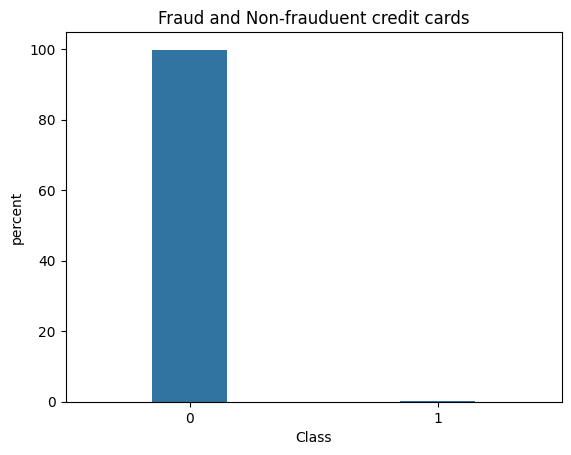

In [45]:
sns.countplot(x='Class', data=df, width=0.3, stat="percent", hue_norm="survived").set_title("Fraud and Non-frauduent credit cards")

Dataset for the testing out the dataset. With the fraudulent rate of ```0.17%``` hence the dataset rate of fraudent transaction are rare due to the security of the transaction. Hence the dataset are imbalance on one side. The non-fraudulent is label as 0 whether the fraudulent is the 1 label

In [46]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### **Expanding the result**
The result above mean about the fraud numbers we about to figure it out. The dataset are varies
 and show the imbalance of the each transaction between V1-V28. Inspect the spread out data for comparison  


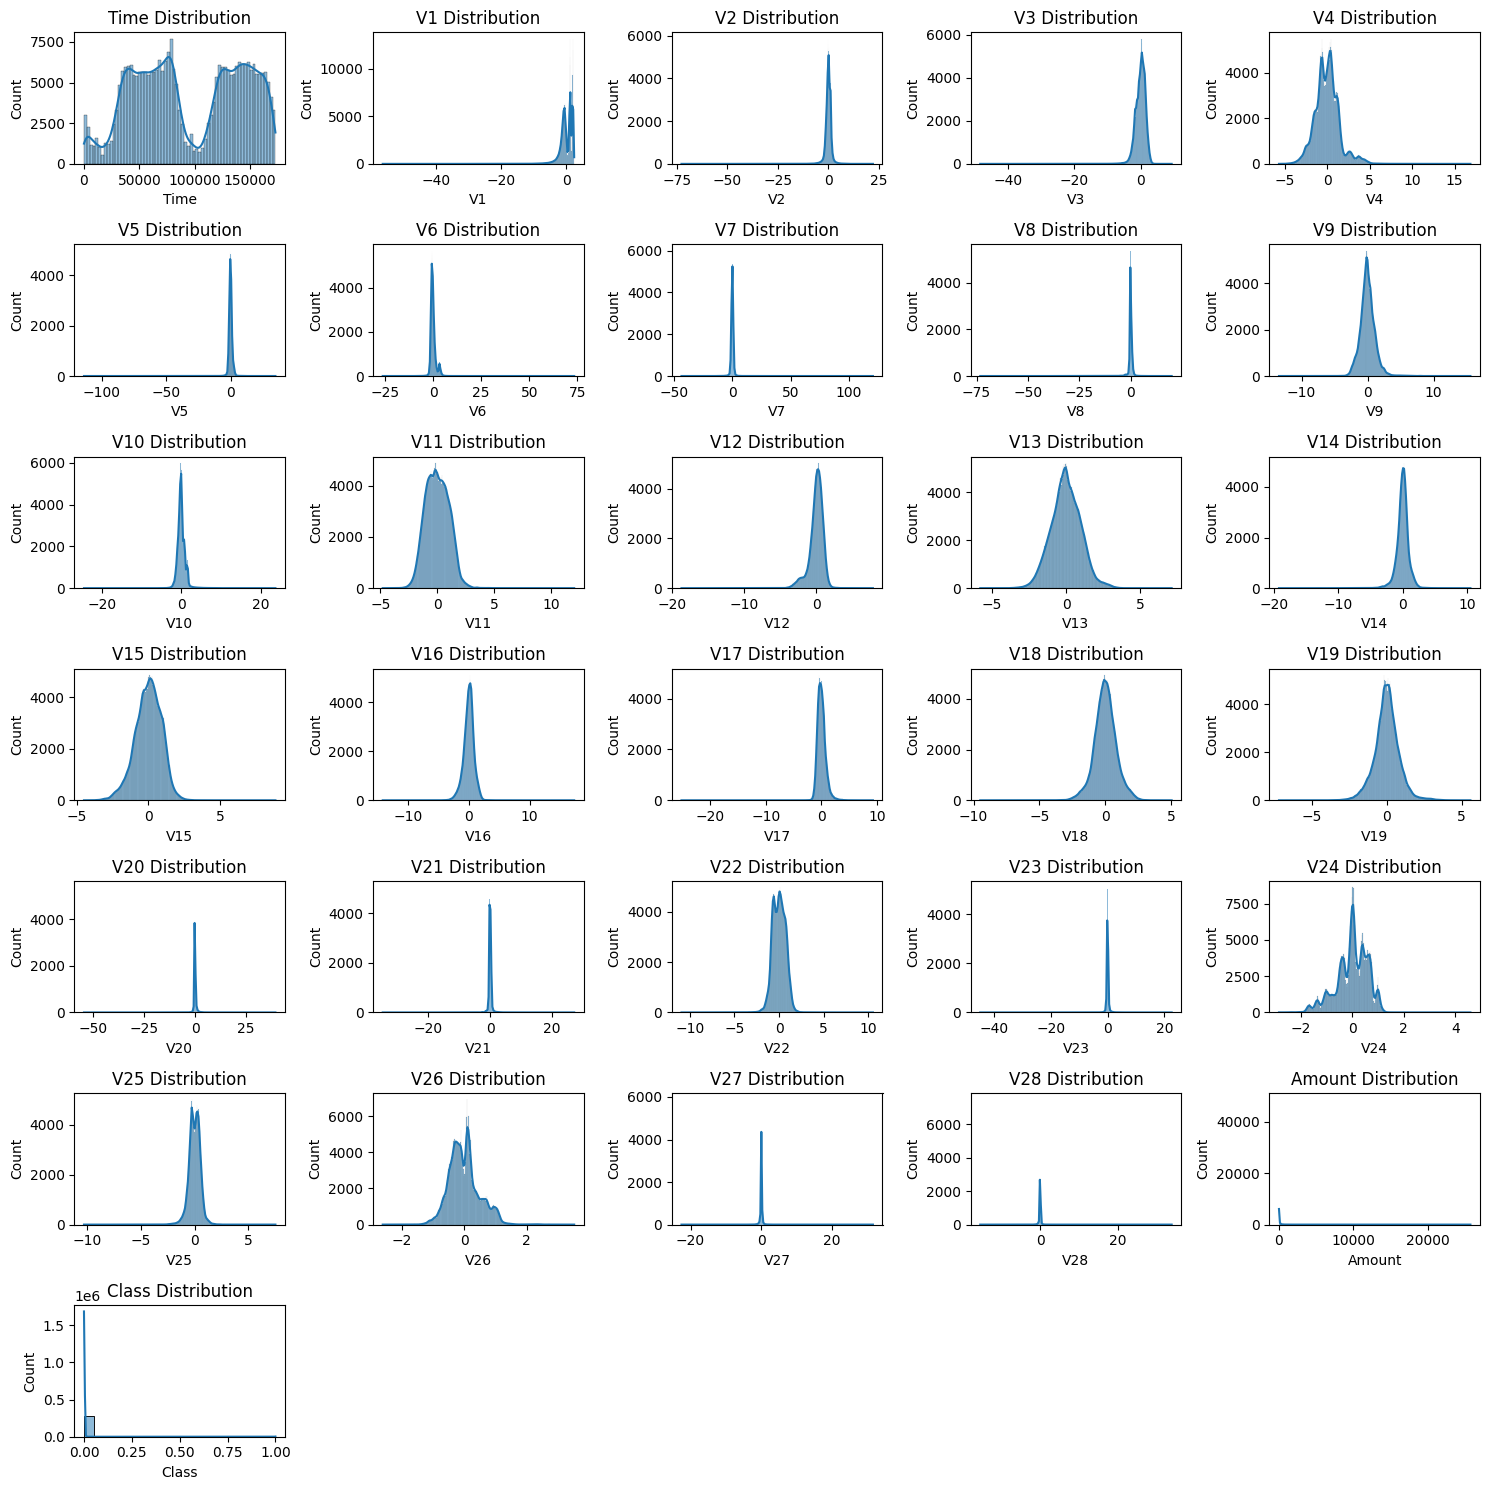

In [48]:
plt.figure(figsize=(15,15))
t = 1
for i in df.columns:
  plt.subplot(7,5,t)
  sns.histplot(df[i], kde= True)
  plt.title(i+' Distribution')
  t+= 1
plt.tight_layout()
plt.show()

### **Data Preprocessing**
This section start from here to pre-process all the dataset into a trainable one. Before all the dataset can be done before the training, we need to scale the dataset, by using the StandardScaler and RobustScaler to test it out the value that can be use for the dataset


In [52]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['Amount'] = std_scaler.fit_transform(pd.DataFrame(df['Amount']))

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [53]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)


df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### **Random Undersampling the Dataset**

In [54]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
rus_fraud_df = df.loc[df['Class'] == 1]
rus_non_fraud_df = df.loc[df['Class'] == 0][:492]

print(rus_fraud_df.shape, rus_non_fraud_df.shape)
#

normal_distributed_df = pd.concat([rus_fraud_df, rus_non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

(492, 31) (492, 31)


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
204278,-0.167819,0.593416,1.964809,-0.508281,-0.415937,0.309948,-0.585035,-0.037155,-0.746804,0.142719,...,-0.229381,0.208341,0.800089,0.054301,-0.481888,-0.081716,-0.201375,0.033836,-0.052387,0
12369,-0.293440,-0.740493,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,...,1.007703,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1
70368,-0.296653,-0.362446,-2.806354,2.066499,-0.298919,-1.691389,-0.606612,1.196604,-1.335577,2.494692,...,-0.173928,0.140360,0.208482,0.258458,-1.347265,-0.411435,0.876237,0.134848,0.077728,0
151196,7.678055,0.120537,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,...,0.944915,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,1
44270,-0.293440,-0.503084,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,...,0.396655,-1.977196,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,1


Text(0.5, 1.0, 'Fraud and Non-frauduent credit cards')

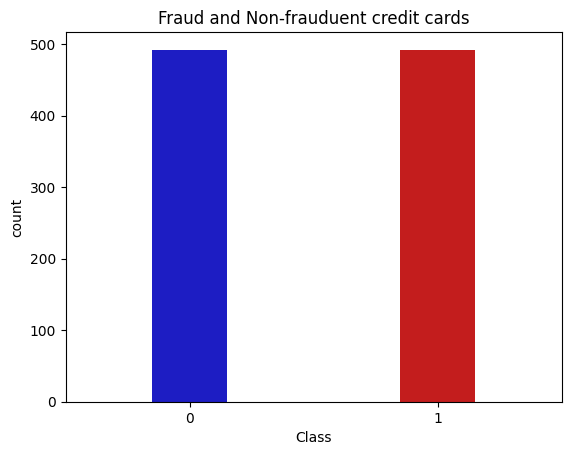

In [55]:
# Finishing undersampling the dataset
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=new_df, width=0.3, palette=colors ).set_title("Fraud and Non-frauduent credit cards")

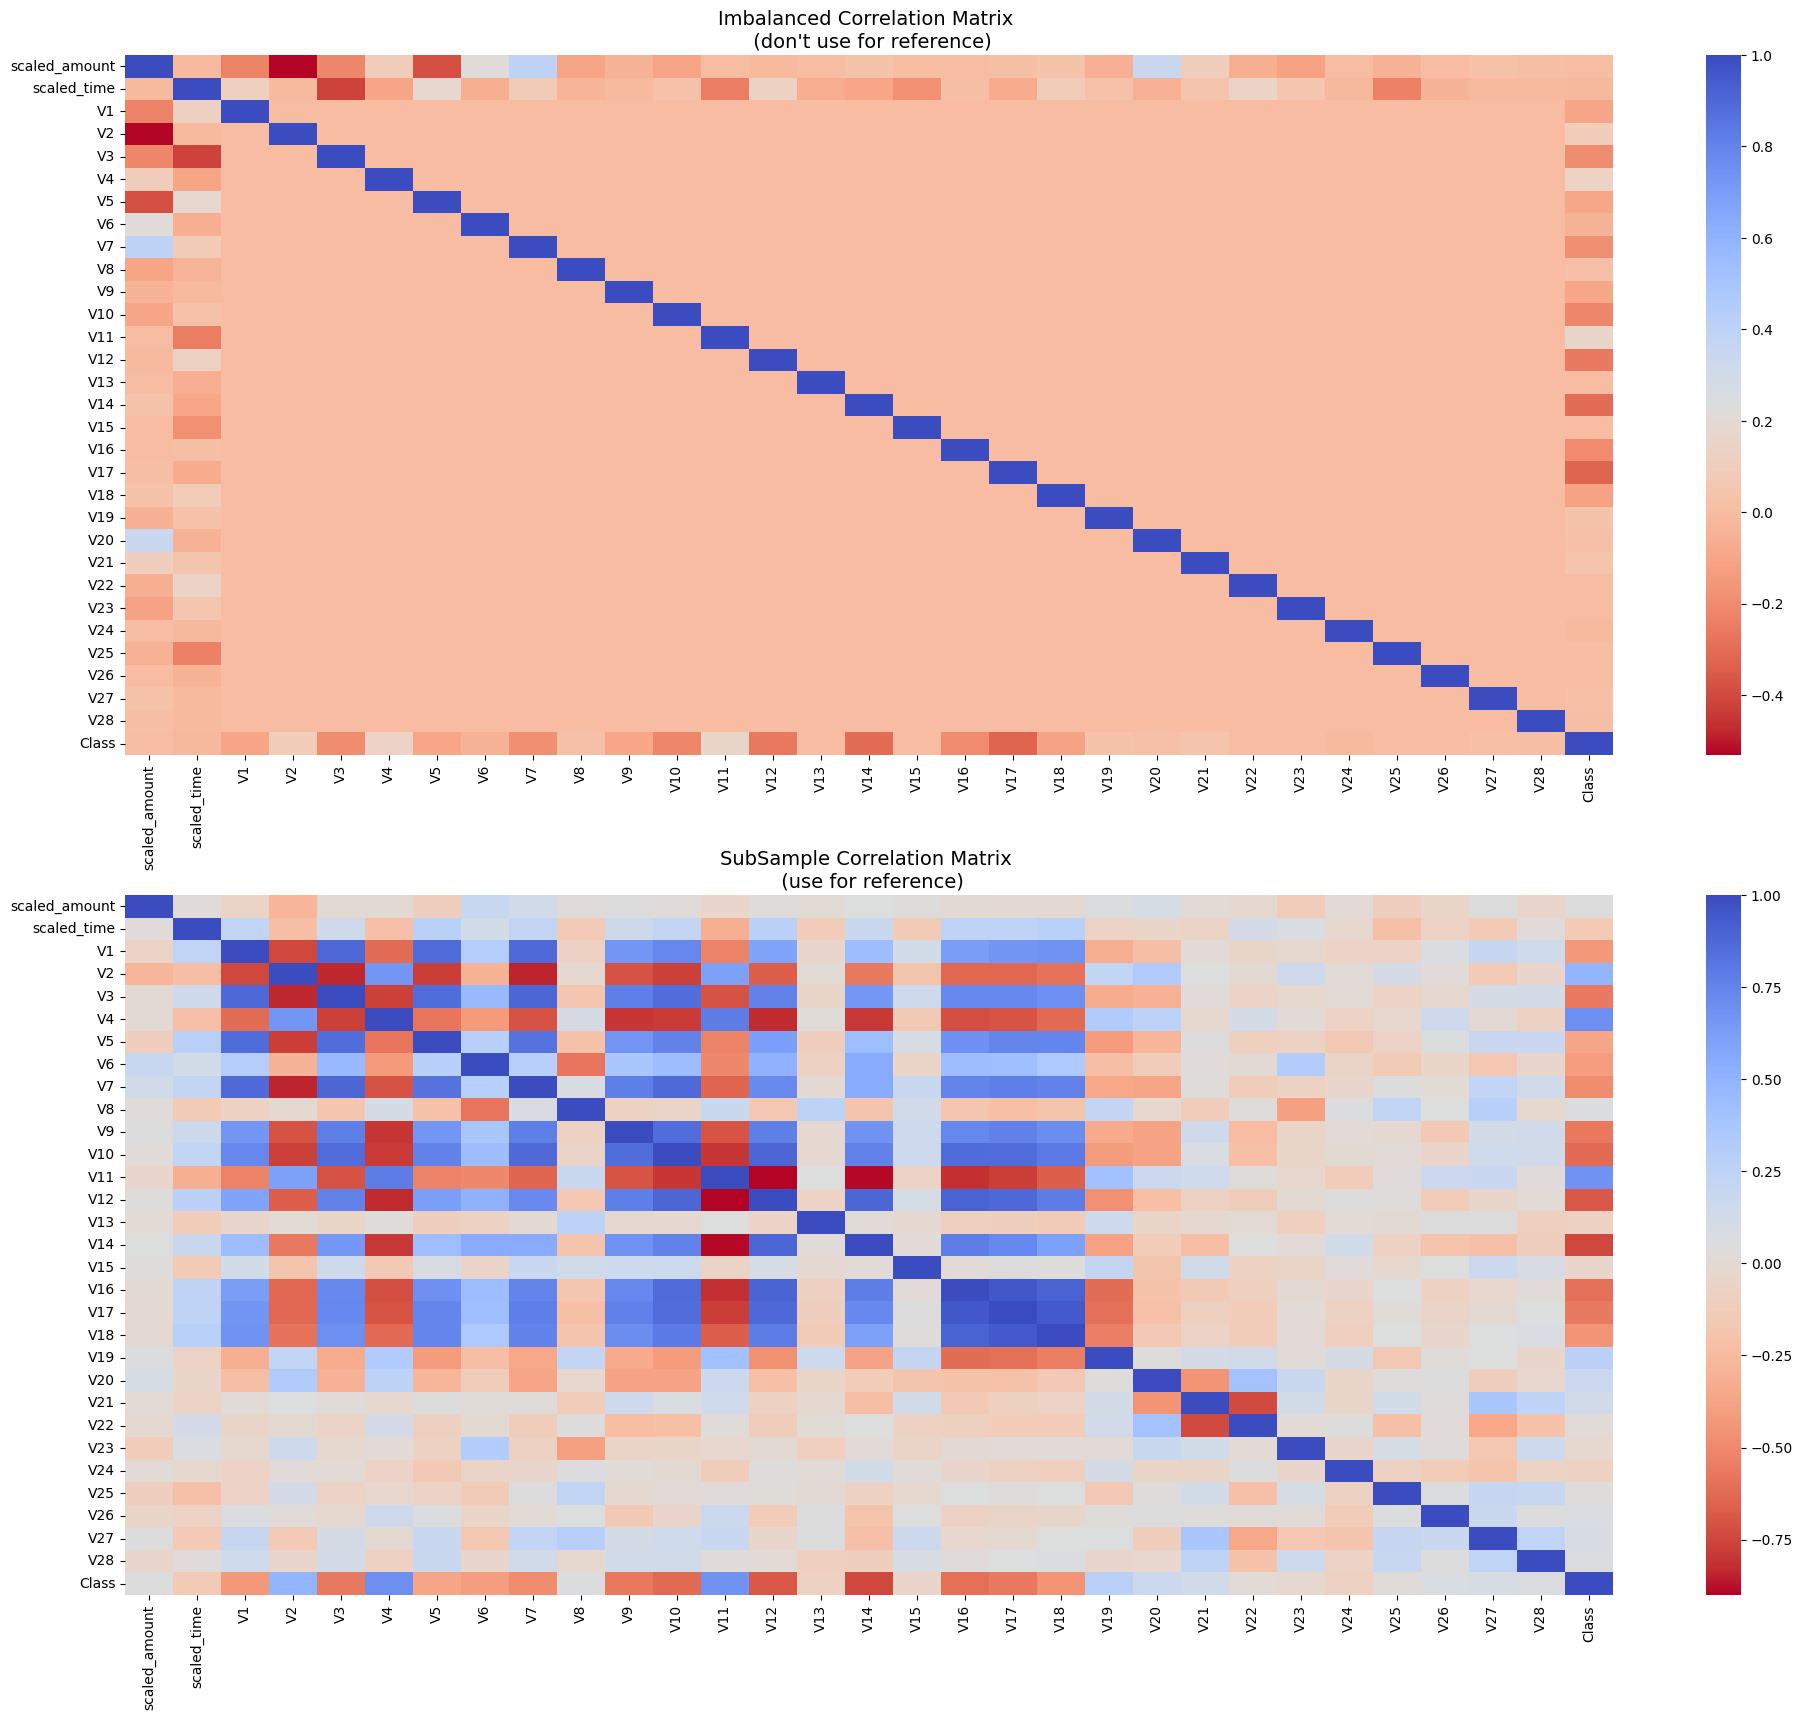

In [56]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

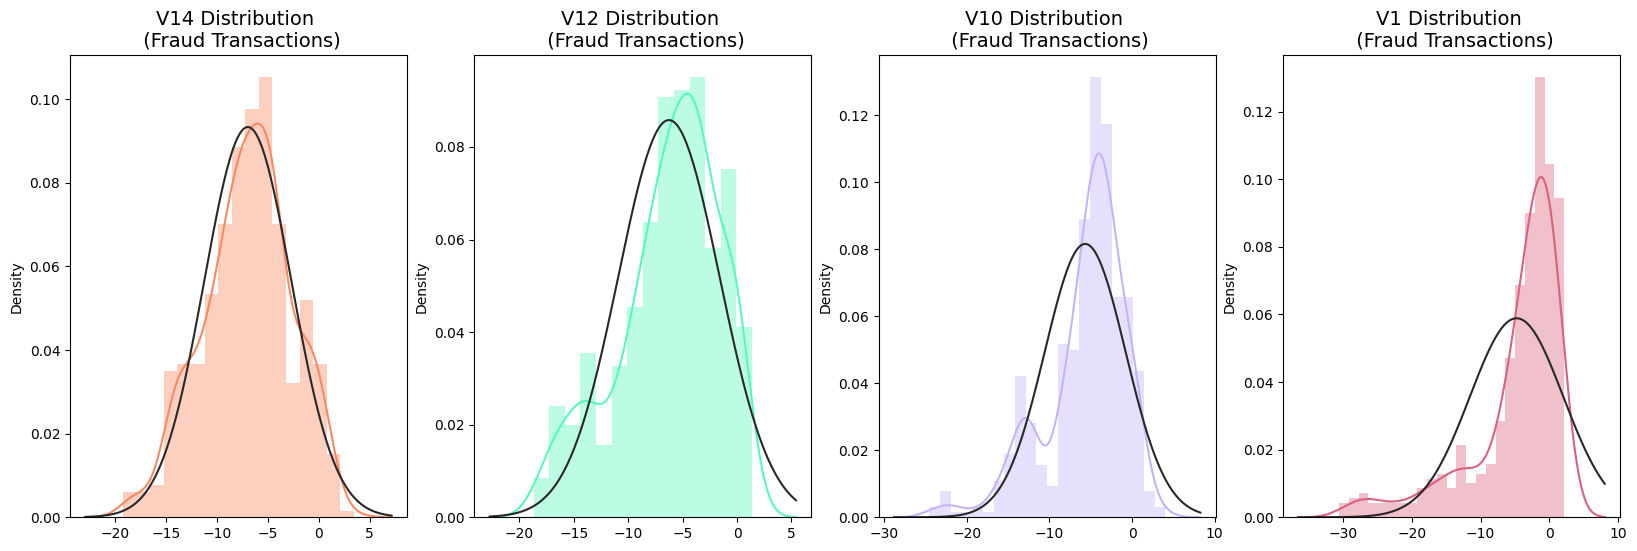

In [57]:
from scipy.stats import norm

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

v1_fraud_dist = new_df['V1'].loc[new_df['Class'] == 1].values
sns.distplot(v1_fraud_dist,ax=ax4, fit=norm, color='#DA627D')
ax4.set_title('V1 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

## **NearMiss Undersampling**

In [117]:
from imblearn.under_sampling import NearMiss

# amount of fraud classes 492 rows.
nm_fraud_df = df.drop(columns=['Class'])
nm_non_fraud_df = df['Class']

nm_non_fraud_df = nm_non_fraud_df.dropna()
nm_fraud_df = nm_fraud_df.dropna()

nm = NearMiss(version=1)
X_resampled, y_resampled = nm.fit_resample(nm_fraud_df, nm_non_fraud_df)

print (X_resampled.shape, y_resampled.shape)

(984, 30) (984,)


### **Train-Test-Split: Working on the dataset**

1. **Using the ```Random Undersampling```**

These method for training, processing the dataset. Using the method of Random Undersampling.

In [118]:
# Splitting the dataset.

from sklearn.model_selection import train_test_split
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

df2 = new_df.copy()
df3 = new_df.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [60]:
# Using the Isolation Forest to recording the anomaly of the dataset

from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

iso = IsolationForest(n_estimators= 100, contamination= 0.0016, random_state= 28)
iso.fit(X)

df2['anomaly'] = iso.predict(X)
df2['anomaly'] = df2['anomaly'].map({1:0, -1:1})

pd.DataFrame(df2)

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,anomaly
204278,-0.167819,0.593416,1.964809,-0.508281,-0.415937,0.309948,-0.585035,-0.037155,-0.746804,0.142719,...,0.208341,0.800089,0.054301,-0.481888,-0.081716,-0.201375,0.033836,-0.052387,0,0
12369,-0.293440,-0.740493,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1,0
70368,-0.296653,-0.362446,-2.806354,2.066499,-0.298919,-1.691389,-0.606612,1.196604,-1.335577,2.494692,...,0.140360,0.208482,0.258458,-1.347265,-0.411435,0.876237,0.134848,0.077728,0,0
151196,7.678055,0.120537,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,...,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,1,0
44270,-0.293440,-0.503084,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,...,-1.977196,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144104,-0.293440,0.013769,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,...,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1,0
12070,-0.293440,-0.749081,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1,0
245837,-0.282401,0.801689,2.053367,-0.066625,-1.068442,0.410003,-0.121762,-1.131583,0.162998,-0.303202,...,-0.284593,-0.684044,0.348202,-0.016090,-0.316991,0.201413,-0.068244,-0.060723,0,0
141260,6.850416,-0.005733,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,1,0


With the above the dataset, the testing method function will take it out 31743 non fraudulent, and 30 transaction as the fraudulent transaction

### **Undersampling Model training**

**Using Logistic Regression**

This logistic regression is the based model that most of use will be using during the first section of the

In [61]:
from sklearn.model_selection import cross_val_score

In [119]:
# Using the LogisticRegression as the methodology of training model

model = LogisticRegression()
model2 = LogisticRegression(solver='saga', random_state=10)

model.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_train_prediction_2 = model2.predict(X_train)
training_data_accuracy_2 = accuracy_score(X_train_prediction_2, Y_train)

y_pred_log_reg = model.predict(X_test)

print("Logistic Regression Report")
print(classification_report(Y_test, y_pred_log_reg))

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Logistic Regression Testing Data Accuracy", round(test_data_accuracy, 2) * 100, "%")

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        98
           1       0.98      0.88      0.93        99

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

Logistic Regression Testing Data Accuracy 93.0 %


After testing with multiple dataset and model training with Logistic Regression can learning up-to ```0.99%``` with this dataset, and compare with the training data accuracy of ```0.998%```

The margin of those result are comparably small. So with Logistic Regression, the data result are fairly accurate


### **Using Decision Tree Classifier**

The Decision Tree is a way to split out the training the dataset, each of every node will split to 2 type of statement, testing out all of the testing purpose to find out hte model working for the dataset.


In [120]:
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, Y_train)
prediction = decision_model.predict(X_test)

print("Decision Tree Report")
print(classification_report(Y_test, prediction))

test_data = accuracy_score(prediction, Y_test)
print("Prediction using the DecisionTree Classifier",round(test_data, 2) * 100, "%")

Decision Tree Report
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        98
           1       0.86      0.87      0.86        99

    accuracy                           0.86       197
   macro avg       0.86      0.86      0.86       197
weighted avg       0.86      0.86      0.86       197

Prediction using the DecisionTree Classifier 86.0 %


Prediction using the DecisionTree Classifier 87.0 %


As the decision model: The dataset prediction more accurate, with the testing data

### **Using the K-Neighbor Classifier**

In [121]:
K_model = KNeighborsClassifier()
K_model.fit(X_train, Y_train)
K_prediction = K_model.predict(X_test)

print("K-Nearest Neighbor Classifier Report")
print(classification_report(Y_test, K_prediction))

K_test_data = accuracy_score(K_prediction, Y_test)
print("Prediction using the K-Nearest Neighbor: ", round(K_test_data, 2)* 100, "%")

K-Nearest Neighbor Classifier Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        98
           1       0.96      0.89      0.92        99

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

Prediction using the K-Nearest Neighbor:  92.0 %


Prediction using the K-Nearest Neighbor:  92.0 %


In [96]:
from sklearn.svm import SVC

svm = SVC(kernel="linear")
svm.fit(X_train, Y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Report")
print(classification_report(Y_test, y_pred_svm))

SVM Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        98
           1       0.96      0.87      0.91        99

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



#### **2. Using NearMiss**

In [31]:
X_train_NM, X_test_NM, Y_train_NM, Y_test_NM = train_test_split(X_resampled, y_resampled,
                                                                test_size=0.2,
                                                                stratify=y_resampled, random_state=10)

In [98]:
# Using the LogisticRegression as the methodology of training model

model = LogisticRegression()
model2 = LogisticRegression(solver='saga', random_state=10)

model.fit(X_train_NM, Y_train_NM)
model2.fit(X_train_NM, Y_train_NM)
# accuracy on training data
X_train_prediction = model.predict(X_train_NM)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train_NM)

X_train_prediction_2 = model2.predict(X_train_NM)
training_data_accuracy_2 = accuracy_score(X_train_prediction_2, Y_train_NM)
print("Logistic Regression Training Data Accuracy: ", round(training_data_accuracy, 2) * 100, "%")
print("Logistic Regression Training Data Accuracy (Model2): ", round(training_data_accuracy_2, 2) * 100, "%")

# accuracy on test data
X_test_prediction = model.predict(X_test_NM)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test_NM)


print(classification_report(Y_test_NM, X_test_prediction))
print("Logistic Regression Testing Data Accuracy", round(test_data_accuracy, 2) * 100, "%")

Logistic Regression Training Data Accuracy:  97.0 %
Logistic Regression Training Data Accuracy (Model2):  96.0 %
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        34
         1.0       0.97      0.97      0.97        34

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68

Logistic Regression Testing Data Accuracy 97.0 %


In [100]:
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train_NM, Y_train_NM)
prediction = decision_model.predict(X_test_NM)
test_data = accuracy_score(prediction, Y_test_NM)

print("Decision Tree Report")
print(classification_report(Y_test_NM, prediction))

print("Prediction using the DecisionTree Classifier",round(test_data, 2) * 100, "%")

Decision Tree Report
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        34
         1.0       0.97      0.97      0.97        34

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68

Prediction using the DecisionTree Classifier 97.0 %


In [102]:
from sklearn.svm import SVC

svm = SVC(kernel="linear")
svm.fit(X_train_NM, Y_train_NM)

# Predict
y_pred_svm = svm.predict(X_test_NM)
test_acc = accuracy_score(y_pred_svm, Y_test_NM)
print("Prediction using the SVM Classifier",round(test_acc, 2) * 100, "%")

# Evaluate
print("Support Vector Classification Model for NearMiss Undersampling")
print(classification_report(Y_test_NM, y_pred_svm))

Prediction using the SVM Classifier 96.0 %
Support Vector Classification Model for NearMiss Undersampling
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        34
         1.0       0.97      0.94      0.96        34

    accuracy                           0.96        68
   macro avg       0.96      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68



#### Clustered UnderSampling

In [123]:
# Initialize ClusterCentroids object
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)

clustered_fraud_df = df.drop(columns=['Class'])
clustered_non_fraud_df = df['Class']

clustered_non_fraud_df = clustered_non_fraud_df.dropna()
clustered_fraud_df = clustered_fraud_df.dropna()

# Resample the dataset
X_cluster, y_cluster = cc.fit_resample(clustered_fraud_df, clustered_non_fraud_df)

# Check the class distribution
print("Resampled class distribution:")
print(clustered_non_fraud_df.value_counts())
print(clustered_fraud_df.value_counts())

Resampled class distribution:
Class
0    284315
1       492
Name: count, dtype: int64
scaled_amount  scaled_time  V1          V2          V3          V4          V5           V6          V7           V8          V9         V10         V11        V12        V13        V14        V15        V16         V17        V18        V19        V20         V21         V22        V23        V24        V25        V26        V27         V28       
-0.286313       0.921768    -1.203617    1.574009    2.889277    3.381404    1.538663     3.698747    0.560211    -0.150911    0.124136   4.220998    1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338   -0.226776  -0.412354   0.234322   1.385597   -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648   -0.855262     18
-0.201775       0.921768    -1.196037    1.585949    2.883976    3.378471    1.511706     3.717077    0.585362    -0.156001    0.122648   4.217934    1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0

In [73]:
X_train_cc, X_test_cc, Y_train_cc, Y_test_cc = train_test_split(X_cluster, y_cluster,
                                                                test_size=0.2,
                                                                stratify=y_cluster, random_state=10)

Prediction ClusteredCentroid with DecisionTree

In [104]:
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train_cc, Y_train_cc)
prediction = decision_model.predict(X_test_cc)

test_data = accuracy_score(prediction, Y_test_cc)
print("Prediction using the DecisionTree Classifier",round(test_data, 2) * 100, "%")

print("Decision Tree Report")
print(classification_report(Y_test_cc, prediction))

Prediction using the DecisionTree Classifier 90.0 %
Decision Tree Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        98
           1       0.89      0.91      0.90        99

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



In [105]:
svm = SVC(kernel="linear")
svm.fit(X_train_cc, Y_train_cc)

# Predict
y_pred_svm = svm.predict(X_test_cc)

# Evaluate
print("Support Vector Classification Model for ClusterdCentroid Undersampling")
print(classification_report(Y_test_cc, y_pred_svm))

Support Vector Classification Model for ClusterdCentroid Undersampling
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        98
           1       0.96      0.92      0.94        99

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



### **Understanding the Oversampling Method**

The dataset we work imbalanced, because of the inequality of the fraudalent - non-fraudulent. We need to Scale the dataset to, with SMOTE (to balanced out the imbalanced one), by multiplying the fraudent one to match the scale of the non-fraudulent.

Understanding SMOTE:

Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated

```Reference: https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets```

![image.png](attachment:d9b7a3be-4340-4dbe-876a-da48a8c68a2e.png)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    X_train_ovs, X_test_ovs = X.iloc[train_index], X.iloc[test_index]
    Y_train_ovs, Y_test_ovs = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
SMOTE_X_train = X_train_ovs.values
SMOTE_X_test = X_test_ovs.values
SMOTE_Y_train = Y_train_ovs.values
SMOTE_Y_test = Y_test_ovs.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(SMOTE_Y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(SMOTE_Y_test, return_counts=True)
print (SMOTE_X_train.shape, SMOTE_Y_train.shape)
print (SMOTE_X_test.shape, SMOTE_Y_test.shape)
print('Label Distributions: \n')
print(train_counts_label/ len(SMOTE_Y_train))
print(test_counts_label/ len(SMOTE_Y_test))

(788, 30) (788,)
(196, 30) (196,)
Label Distributions: 

[0.5 0.5]
[0.5 0.5]


In [111]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []


for train, test in sss.split(SMOTE_X_train, SMOTE_Y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(SMOTE_X_train[train], SMOTE_Y_train[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(SMOTE_X_train[test])

    accuracy_lst.append(pipeline.score(SMOTE_X_train[test], SMOTE_Y_train[test]))
    precision_lst.append(precision_score(SMOTE_Y_train[test], prediction))
    recall_lst.append(recall_score(SMOTE_Y_train[test], prediction))
    f1_lst.append(f1_score(SMOTE_Y_train[test], prediction))

print("accuracy: {}".format(round(np.mean(accuracy_lst)*100)),"%")
print("precision: {}".format(round(np.mean(precision_lst)*100)),"%")
print("recall: {}".format(round(np.mean(recall_lst)*100)),"%")
print("f1: {}".format(round(np.mean(f1_lst)*100)),"%")


accuracy: 93 %
precision: 96 %
recall: 89 %
f1: 92 %


In [114]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



def evaluate_model(model, X_train, Y_train, X_test, Y_test):
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  print(classification_report(Y_test, y_pred))


oversamplers = {
    "SMOTE": SMOTE(random_state=42),
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "ADASYN": ADASYN(random_state=42)
}


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for oversampler_name, oversampler in oversamplers.items():
    print(f"\nResults for {oversampler_name}:")
    X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train_ovs, Y_train_ovs)
    for model_name, model in models.items():
        print(f"\n{model_name}:")
        evaluate_model(model, X_train_resampled, Y_train_resampled, X_test_ovs, Y_test_ovs)



Results for SMOTE:

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        98
           1       0.95      0.92      0.93        98

    accuracy                           0.93       196
   macro avg       0.93      0.93      0.93       196
weighted avg       0.93      0.93      0.93       196


Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        98
           1       0.89      0.93      0.91        98

    accuracy                           0.91       196
   macro avg       0.91      0.91      0.91       196
weighted avg       0.91      0.91      0.91       196


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        98
           1       0.96      0.93      0.94        98

    accuracy                           0.94       196
   macro avg       0.94      0.94      0.94     